In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('diamonds.csv', index_col=0)

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


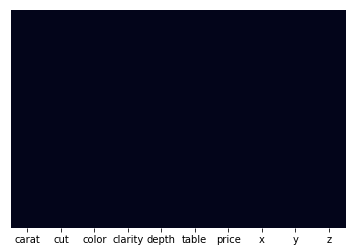

In [4]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False)

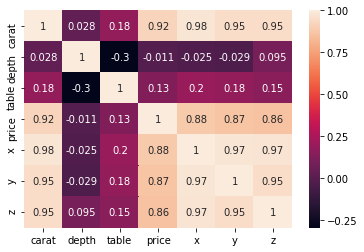

In [5]:
corr = data.corr()
sns.heatmap(corr, annot=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
categorical_feature_mask = data.dtypes==object
categorical_cols = data.columns[categorical_feature_mask].tolist()

In [8]:
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))

In [9]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


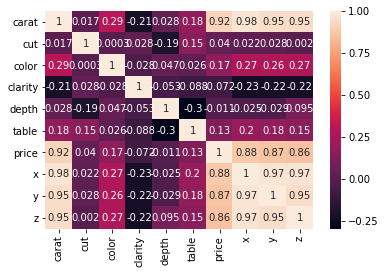

In [10]:
corr2 = data.corr()
sns.heatmap(corr2, annot=True)

In [11]:
data.drop(['depth','table'],axis=1, inplace=True)
data.drop(['x','y','z'],axis=1, inplace=True)

In [12]:
data.head(10)

,carat,cut,color,clarity,price
1,0.23,2,1,3,326
2,0.21,3,1,2,326
3,0.23,1,1,4,327
4,0.29,3,5,5,334
5,0.31,1,6,3,335
6,0.24,4,6,7,336
7,0.24,4,5,6,336
8,0.26,4,4,2,337
9,0.22,0,1,5,337
10,0.23,4,4,4,338


In [13]:
from xgboost import XGBRegressor

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = data
y = data['price']
X.drop(['price'], axis=1, inplace=True)

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)

In [17]:
model = XGBRegressor(n_estimators=1000, learning_rate=0.05)

In [18]:
model.fit(X_train, y_train)

C:\Users\Abhishek Mohanty\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:02:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [19]:
y_pred = model.predict(X_valid)

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [21]:
score = mean_absolute_error(y_valid, y_pred)
print('MAE: (MODEL - ExtremeGradientBoost) ', score)

MAE: (MODEL - ExtremeGradientBoost)  301.9842447915724


In [22]:
accuracy = round(model.score(X_valid, y_valid) * 100, 3) 
print('Model Accuracy: ', accuracy)

Model Accuracy:  97.939


In [25]:
choice = input("Wanna Make A Prediction? y/n ")
while(choice=='y'):
    
    carat_val = float(input("Enter Carat Value: "))
    cut_qual = int(input("Enter Cut Quality: "))
    color_val = int(input("Enter Color: "))
    cla_val = int(input("Enter Measurue of Clarity: "))
    
    X_n = {'carat': [carat_val], 'cut': [cut_qual], 'color': [color_val], 'clarity': [cla_val]}
    X_user = pd.DataFrame(X_n)
    
    user_pred = model.predict(X_user)
    print("The Predicted Value of the Diamond is: %s USD" %user_pred[0])
    
    choice = input("Want to Continue? y/n")

Wanna Make A Prediction? y/n y
Enter Carat Value: 0.5
Enter Cut Quality: 2
Enter Color: 4
Enter Measurue of Clarity: 2
The Predicted Value of the Diamond is: 1319.4247 USD
Want to Continue? y/nn
